In [2]:
#Importing packages needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math

In [8]:
#Getting the stock quote
df = pd.read_csv('R.max.csv')
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index('Date')
#Showing the data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,8.000000,8.125000,8.000000,8.083333,2.202747,23400
1980-01-03,7.875000,7.875000,7.583333,7.791667,2.123265,131400
1980-01-04,7.791667,7.875000,7.708333,7.833333,2.134620,85500
1980-01-07,7.666667,7.666667,7.666667,7.666667,2.089202,34200
1980-01-08,7.666667,7.666667,7.416667,7.500000,2.043786,797100
...,...,...,...,...,...,...
2020-11-09,55.000000,56.990002,53.590000,53.849998,53.849998,672500
2020-11-10,54.009998,55.660000,53.669998,55.270000,55.270000,470800
2020-11-11,55.480000,55.720001,53.500000,55.169998,55.169998,378100


In [9]:
#finding the number of rows and columns
df.shape

(10308, 6)

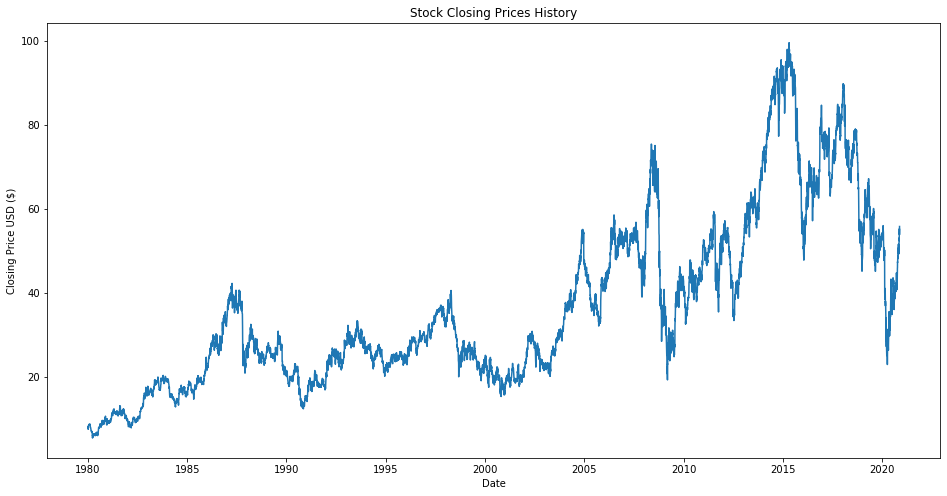

In [10]:
#Visualize the closing price of the stock in question
plt.figure(figsize=(16,8))
plt.plot(df.Close,label='Close')
plt.title('Stock Closing Prices History')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
plt.show()

In [12]:
#Creating a new dataframe for the training data
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.80)
print(training_data_len)

8247


In [13]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02831958],
       [0.02522213],
       [0.02566462],
       ...,
       [0.52837265],
       [0.51424828],
       [0.53506316]])

In [14]:
#creating training dataset, X_train and y_train
train_data = scaled_data[0:training_data_len,:]
#split into x_train y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(X_train)
        print(y_train)
        print()

[array([0.02831958, 0.02522213, 0.02566462, 0.02389465, 0.02212467,
       0.02566462, 0.02787709, 0.03053205, 0.03230202, 0.03185953,
       0.03185953, 0.03185953, 0.03185953, 0.03318701, 0.03318701,
       0.03318701, 0.03495698, 0.03495698, 0.0345145 , 0.0345145 ,
       0.0336295 , 0.0336295 , 0.0336295 , 0.0345145 , 0.03495698,
       0.0345145 , 0.03495698, 0.03539948, 0.0345145 , 0.03053205,
       0.03008956, 0.03008956, 0.0274346 , 0.0274346 , 0.02654961,
       0.02477963, 0.02300966, 0.02123969, 0.02300966, 0.02212467,
       0.0203547 , 0.01991221, 0.01814223, 0.01814223, 0.01769973,
       0.01769973, 0.01858473, 0.01504477, 0.01637225, 0.01592977,
       0.01637225, 0.01504477, 0.01504477, 0.01592977, 0.01460229,
       0.01371729, 0.01106233, 0.00884987, 0.00619491, 0.00707989])]
[0.0]



In [15]:
#Convert the training sets to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshape the data into 3d shapes for the LSTM model
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(8187, 60, 1)

In [16]:
#Building the LSTM MODEL
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#complie the model
model.compile(optimizer='adam',loss='mean_squared_error')

#Train the model
model.fit(X_train,y_train,batch_size=1, epochs= 2)

Epoch 1/2
8187/8187 [==============================] - 891s 109ms/step - loss: 4.0726e-04
Epoch 2/2
8187/8187 [==============================] - 913s 112ms/step - loss: 1.4599e-04


In [17]:
#Creating the testing data set
#from 8187-end
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets X_test,y_test

X_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [18]:
#Convert to array and reshape into a 3d numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(2061, 60, 1)

In [21]:
#Prediting the X_test data with the LSTM model
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
pred

#Root mean error (RMSE) score
#The close the values is to zero the better the predition will be
rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

0.8637128167603191

C:\Users\nikes\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


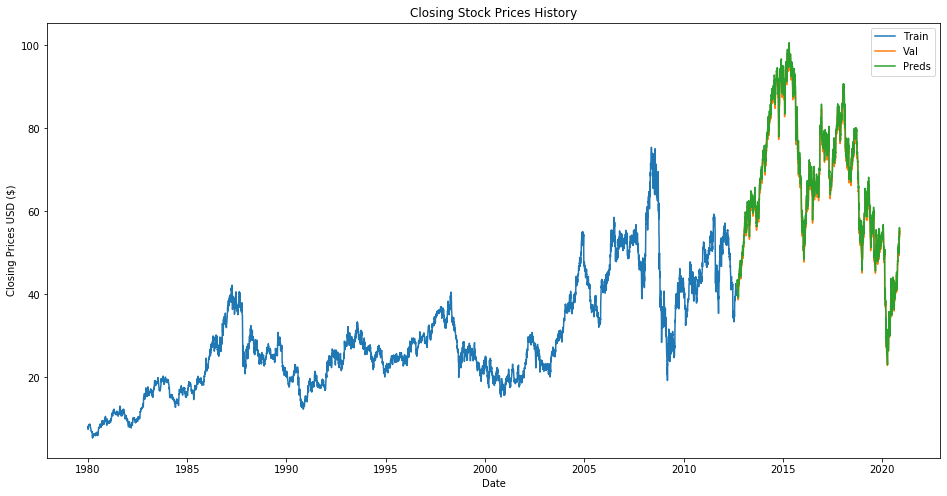

In [22]:
#Creating variables for visualization
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Preds'] = pred

#Visualizing the stock prices and predictions
plt.figure(figsize=(16,8))
plt.title('Closing Stock Prices History')
plt.xlabel('Date')
plt.ylabel('Closing Prices USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Preds']])
plt.legend(['Train','Val','Preds'])
plt.show()

In [23]:
#Show the vlaid and predicted prices
valid

,Close,Preds
Date,,
2012-09-07,41.669998,41.566418
2012-09-10,42.380001,42.210453
2012-09-11,42.759998,42.972595
2012-09-12,42.669998,43.351997
2012-09-13,43.020000,43.253830
...,...,...
2020-11-09,53.849998,53.133728
2020-11-10,55.270000,54.729267
2020-11-11,55.169998,56.098522


In [24]:
#Getting new quote for next day prediction
stock_quote = df
#Creating the a new dataframe 
new_df = stock_quote.filter(['Close'])
#Gathering the last 60 day information for the closing price and changing into an array
last_60_days = new_df[-60:].values
#Scaling the last 60 days between 0 and 1
last_60_days_s = scaler.transform(last_60_days)
#Creating an empty list to store the scaled date
test = []
test.append(last_60_days_s)
#Converting the list to an array and reshaping into a 3d array
test = np.array(test)
test = np.reshape(test,(test.shape[0],test.shape[1],1))
#Getting the predicted scaled price 
pred_price = model.predict(test)
#undo the scaling to see the actual price
pred_price = scaler.inverse_transform(pred_price)
#view the pred price
print(pred_price)

[[56.703587]]
